## After the process finished we can analyse de results. Let's read the aggregated scores into a single DataFrame

In [1]:
import re

def parse_results(f_name: str):
    pattern = r"score_report_(.*?)__top_k:(\d+)__chunk_size:(\d+)\.csv"
    match = re.search(pattern, f_name)
    if match:
        embeddings_model = match.group(1)
        top_k = int(match.group(2))
        chunk_size = int(match.group(3))
        return embeddings_model, top_k, chunk_size
    else:
        print("No match found")

In [2]:
import pandas as pd

def read_scores(path: str):
    all_scores = []
    for root, dirs, files in os.walk(path):
        for f_name in files:
            if not f_name.startswith("score_report"):
                continue

            embeddings_model, top_k, chunk_size = parse_results(f_name)
            df = pd.read_csv(path+"/"+f_name)
            df_transposed = df.T
            df_transposed.columns = df_transposed.iloc[0]
            df_transposed = df_transposed[1:]

            # Add new columns
            df_transposed['embeddings'] = embeddings_model
            df_transposed['top_k'] = top_k
            df_transposed['chunk_size'] = chunk_size

            all_scores.append(df_transposed)

    df = pd.concat(all_scores)
    df.reset_index(drop=True, inplace=True)
    df.rename_axis(None, axis=1, inplace=True)

    return df

In [5]:
import os
df = read_scores('results/aragog_parameter_search_2024_06_12/')

In [6]:
df

,context_relevance,faithfulness,sas,embeddings,top_k,chunk_size
0,0.791589,0.67757,0.480863,all-mpnet-base-v2,1,64
1,0.941952,0.91472,0.645992,all-mpnet-base-v2,3,256
2,0.946651,0.88785,0.639072,all-mpnet-base-v2,2,256
3,0.949844,0.866822,0.613355,msmarco-distilroberta-base-v2,1,256
4,0.933489,0.948598,0.65133,all-MiniLM-L6-v2,3,64
5,0.952544,0.893769,0.662694,msmarco-distilroberta-base-v2,2,256
6,0.867887,0.834112,0.560079,all-mpnet-base-v2,1,256
7,0.964182,0.943925,0.62854,msmarco-distilroberta-base-v2,3,256
8,0.88004,0.929907,0.600428,msmarco-distilroberta-base-v2,2,64
9,0.909813,0.738318,0.530884,msmarco-distilroberta-base-v2,1,64


## Let's see wich parameter configuration yielded the best Semantic Similarity Answer score

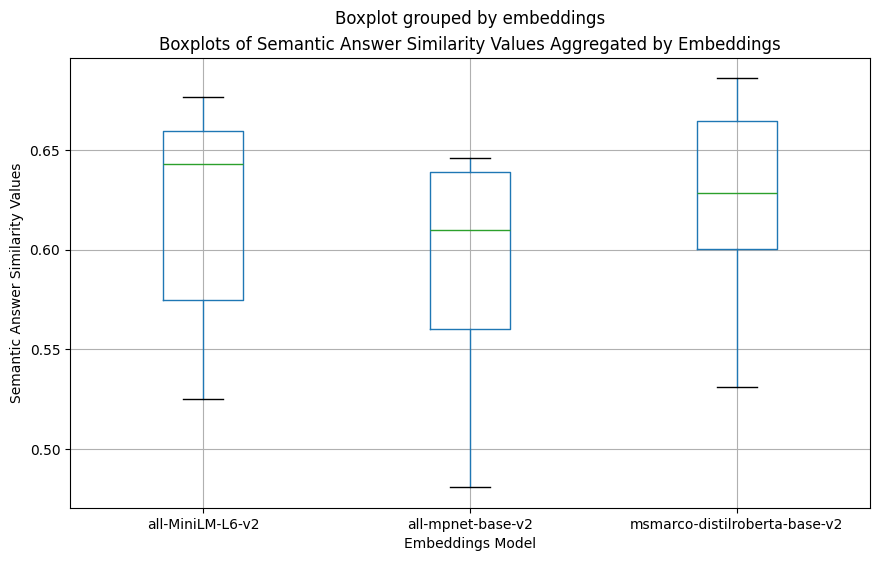

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='sas', by='embeddings', ax=ax)

plt.xlabel("Embeddings Model")
plt.ylabel("Semantic Answer Similarity Values")
plt.title("Boxplots of Semantic Answer Similarity Values Aggregated by Embeddings")

#plt.show()
plt.savefig("bloxplot.png")

## Let's see what are the `top_k` and `chunk_size` values for the outliers

### `all-mpnet-base-v2`

In [8]:
df_tmp = df[df['embeddings'] == 'all-mpnet-base-v2']

In [9]:
df_tmp.loc[df_tmp['sas'].idxmax()]

context_relevance             0.941952
faithfulness                   0.91472
sas                           0.645992
embeddings           all-mpnet-base-v2
top_k                                3
chunk_size                         256
Name: 1, dtype: object

In [10]:
df_tmp.loc[df_tmp['sas'].idxmin()]

context_relevance             0.791589
faithfulness                   0.67757
sas                           0.480863
embeddings           all-mpnet-base-v2
top_k                                1
chunk_size                          64
Name: 0, dtype: object

## `msmarco-distilroberta-base-v2`

In [11]:
df_tmp = df[df['embeddings'] == 'msmarco-distilroberta-base-v2']

In [12]:
df_tmp.loc[df_tmp['sas'].idxmax()]

context_relevance                         0.945016
faithfulness                              0.936916
sas                                        0.68591
embeddings           msmarco-distilroberta-base-v2
top_k                                            3
chunk_size                                     128
Name: 17, dtype: object

In [13]:
df_tmp.loc[df_tmp['sas'].idxmin()]

context_relevance                         0.909813
faithfulness                              0.738318
sas                                       0.530884
embeddings           msmarco-distilroberta-base-v2
top_k                                            1
chunk_size                                      64
Name: 9, dtype: object

## `all-MiniLM-L6-v2`

In [14]:
df_tmp = df[df['embeddings'] == 'all-MiniLM-L6-v2']

In [15]:
df_tmp.loc[df_tmp['sas'].idxmax()]

context_relevance            0.909638
faithfulness                 0.932243
sas                          0.676347
embeddings           all-MiniLM-L6-v2
top_k                               3
chunk_size                        256
Name: 26, dtype: object

In [16]:
df_tmp.loc[df_tmp['sas'].idxmin()]

context_relevance            0.834891
faithfulness                 0.738318
sas                          0.524882
embeddings           all-MiniLM-L6-v2
top_k                               1
chunk_size                         64
Name: 21, dtype: object

## Let's inspect individual queries for this parameter configuration

In [19]:
detailed_best_sas_df = pd.read_csv("results/aragog_parameter_search_2024_06_12/detailed_msmarco-distilroberta-base-v2__top_k:3__chunk_size:128.csv")

In [20]:
detailed_best_sas_df

,questions,contexts,true_answers,predicted_answers,context_relevance,faithfulness,sas
0,What are the two main tasks BERT is pre-traine...,['steps in our\nframework: pre-training and ﬁn...,Masked LM (MLM) and Next Sentence Prediction (...,NaN,1.0,1.0,0.052841
1,"What model sizes are reported for BERT, and wh...","['on the 336M model, the modiﬁcations\nin (b) ...","BERTBASE (L=12, H=768, A=12, Total Parameters=...","BERT BASE (L=12, H=768, A=12, Total Parameters...",1.0,1.0,0.738328
2,How does BERT's architecture facilitate the us...,"['DistilBERT, a distilled version of BERT: sma...",BERT uses a multi-layer bidirectional Transfor...,BERT's architecture facilitates the use of a u...,1.0,1.0,0.794824
3,Can you describe the modifications LLaMA makes...,['increasing computational\nneeds. Our work ai...,LLaMA incorporates pre-normalization (using R...,NaN,1.0,1.0,-0.046518
4,How does LLaMA's approach to embedding layer o...,"['embedding GEMM. How-\never, in transformer l...",LLaMA introduces optimizations in its embeddin...,LLaMA's approach to embedding layer optimizati...,1.0,1.0,0.814197
...,...,...,...,...,...,...,...
102,How do the selected tasks in SuperGLUE reflect...,"['high-level goals, the original version of\nt...","The selected tasks, chosen for their difficult...",The selected tasks in SuperGLUE reflect the be...,1.0,1.0,0.891120
103,"In the context of PAL, what role do meaningful...",['et al.\n(2021); Madaan et al. (2022). We cre...,Meaningful variable names in PAL's generated c...,Meaningful variable names are important in the...,1.0,1.0,0.588567
104,How does PAL address the execution of complex ...,"['intermediate\nreasoning steps, but ofﬂoads t...",PAL addresses complex computations by generat...,PAL addresses the execution of complex computa...,1.0,1.0,0.889795
105,How does SuperGLUE's design ensure it presents...,"['high-level goals, the original version of\nt...",SuperGLUE introduces more challenging tasks re...,SuperGLUE's design ensures a more challenging ...,1.0,1.0,0.932926


In [21]:
def inspect(idx):
    print("Question: ")
    print(detailed_best_sas_df.loc[idx]['questions'])
    print("\nTrue Answer:")
    print(detailed_best_sas_df.loc[idx]['true_answers'])
    print()
    print("Generated Answer:")
    print(detailed_best_sas_df.loc[idx]['predicted_answers'])
    print()
    print(f"Context Relevance  : {detailed_best_sas_df.loc[idx]['context_relevance']}")
    print(f"Faithfulness       : {detailed_best_sas_df.loc[idx]['faithfulness']}")
    print(f"Semantic Similarity: {detailed_best_sas_df.loc[idx]['sas']}")
    print()
    print("Contexts:")
    for context in eval(detailed_best_sas_df.loc[idx]['contexts']):
        print(context)
        print("---------")
    print()

In [22]:
inspect(1)

Question: 
What model sizes are reported for BERT, and what are their specifications?

True Answer:
BERTBASE (L=12, H=768, A=12, Total Parameters=110M) and BERTLARGE (L=24, H=1024, A=16, Total Parameters=340M).

Generated Answer:
BERT BASE (L=12, H=768, A=12, Total Parameters=110M) and BERT LARGE (L=24, H=1024, A=16, Total Parameters=340M)

Context Relevance  : 1.0
Faithfulness       : 1.0
Semantic Similarity: 0.7383280992507935

Contexts:
on the 336M model, the modiﬁcations
in (b) enable stable training with lower training loss.
Using the architecture change in Figure 7(b), we consider
three different cases as detailed in Table 4. The 336M model
has the same size as BERT-large. The 1.3B is the same as
the BERT-xlarge conﬁguration that was previously shown
to get worse results than the 336M BERT-large model (Lan
et al., 2019). We further scale the BERT model using both
larger hidden size as well as more layers to arrive at the 3.9B
parameter case. In all cases, the hidden size per atte

In [73]:
inspect(44)

Question: 
How should future language model benchmarks be structured to ensure a holistic assessment of models' capabilities and knowledge breadth?

True Answer:
Future benchmarks should integrate a broader spectrum of subjects and cognitive skills, emphasizing the inclusion of tasks that test models' ethical reasoning, understanding of human values, and ability to perform complex problem-solving, beyond the mere scale of data and parameters.

Generated Answer:
Future language model benchmarks should be structured to measure knowledge acquired during pretraining by evaluating models exclusively in zero-shot and few-shot settings across a diverse set of subjects that humans learn. The benchmark should cover a wide range of subjects across STEM, humanities, social sciences, and more, ranging in difficulty from elementary to advanced professional levels. It should test both world knowledge and problem-solving ability, ensuring a holistic assessment of models' capabilities and knowledge br